#   EE 521 DSP Lab 

##  Assignment-6 | AVI KHANDELWAL, 204102301 

## Libraries used -

In [1]:
import numpy as np
from numpy import sin,cos,pi
import matplotlib.pyplot as plt
import math as m
import warnings
import pandas as pd
from google.colab import files
import pywt 
import io
from google.colab import drive

warnings.filterwarnings('ignore')

### Q1. A. Generate a real chirp signal


#### A signal that varies in frequency over time is called “chirp”. The frequency of the chirp signal can vary from low to high frequency (up-chirp) or from high to low frequency (low-chirp).

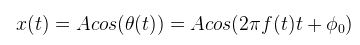

image.png

Text(0, 0.5, 'Amplitude')

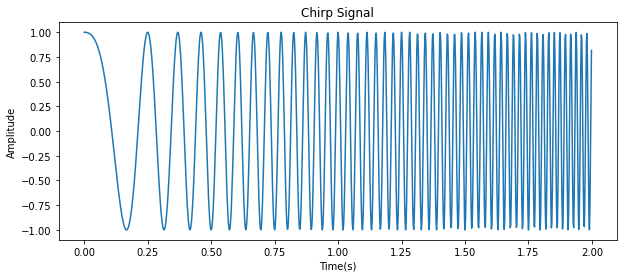

In [5]:
fs = 500
t = np.arange(0,2,1/fs)

fo = 1
A = 1
f = 12*t + fo
phi = 0
x = A*cos(2*pi*f*t + phi)
plt.figure(1,figsize=(10,4))
plt.plot(t,x)
plt.title('Chirp Signal')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')

### B. Compute the subband decomposition of this signal upto three levels and plot the approximate and detail components.

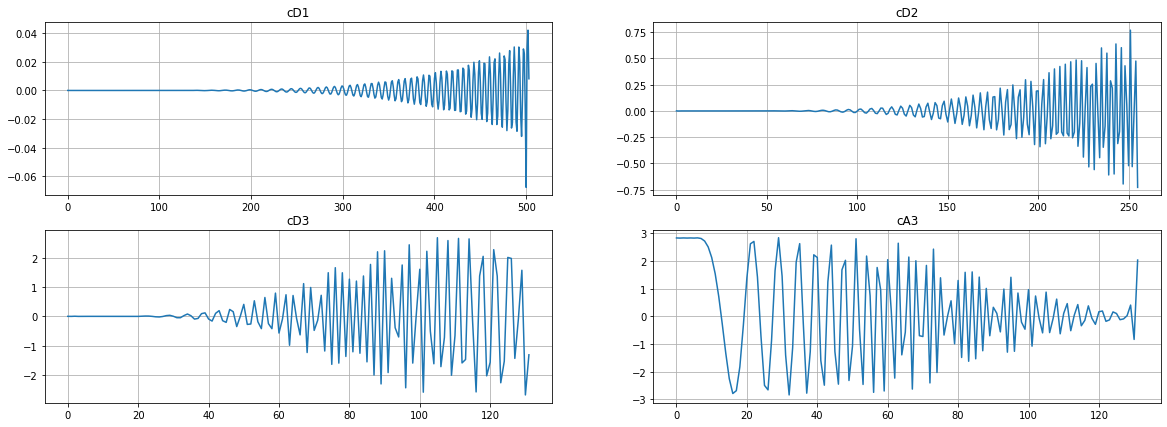

In [6]:
cA3,cD3,cD2,cD1 = pywt.wavedec(x,wavelet='db5',level=3)

fig = plt.figure(figsize=(20,7))

ax1 = fig.add_subplot(2, 2, 1)
ax1.set_title("cD1")
ax1.grid()
ax1.plot(cD1)

ax2 = fig.add_subplot(2, 2, 2)
ax2.set_title("cD2")
ax2.grid()
ax2.plot(cD2)

ax3 = fig.add_subplot(2, 2, 3)
ax3.set_title("cD3")
ax3.grid()
ax3.plot(cD3)

ax4 = fig.add_subplot(2, 2, 4)
ax4.set_title("cA3")
ax4.grid()
ax4.plot(cA3)

### 2. Consider the sample HeaviSine signal in PyWavelets library. The signal is added with AWGN and a noisy signal is generated with SNR of 15 dB.  


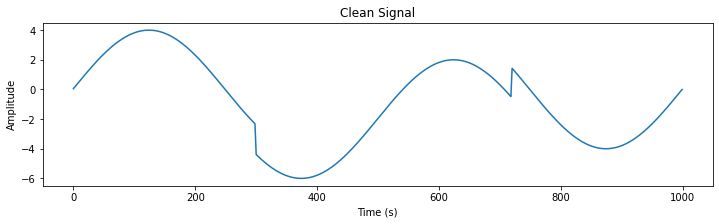

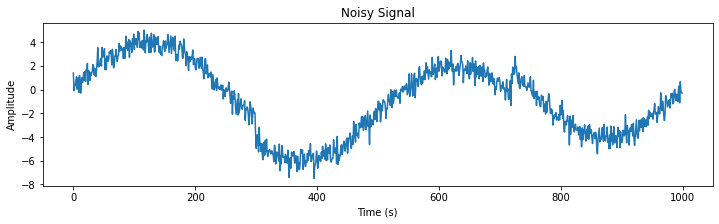

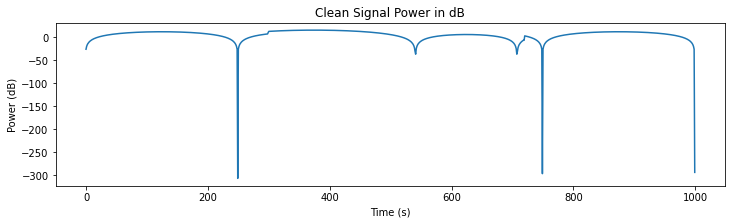

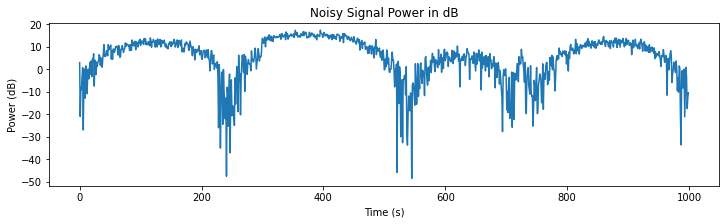

In [7]:
x = pywt.data.demo_signal(name='HeaviSine', n=1000)
t = np.arange(0,1000)

plt.figure(1,figsize=(12,3))
plt.plot(t, x)
plt.title('Clean Signal')
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.show()

x_pow = x ** 2
snr_db = 15
x_avg_pow = np.mean(x_pow)
x_avg_db = 10 * np.log10(x_avg_pow)
awgn_avg_db = x_avg_db - snr_db
awgn_avg_watts = 10 ** (awgn_avg_db / 10)
mean_awgn = 0
awgn = np.random.normal(mean_awgn, np.sqrt(awgn_avg_watts),1000)
x_noisy = x + awgn

plt.figure(2,figsize=(12,3))
plt.title('Noisy Signal')
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.plot(t, x_noisy)


plt.figure(3,figsize=(12,3))
x_db = 10 * np.log10(x_pow)
plt.plot(t, x_db)
plt.title('Clean Signal Power in dB')
plt.ylabel('Power (dB)')
plt.xlabel('Time (s)')
plt.show()

plt.figure(4,figsize=(12,3))
x_noisy_db = 10 * np.log10(x_noisy**2)
plt.plot(t, x_noisy_db)
plt.title('Noisy Signal Power in dB')
plt.ylabel('Power (dB)')
plt.xlabel('Time (s)')
plt.show()

### (a) Perform Wavelet decomposition on this signal

In [8]:
cA5,cD5,cD4,cD3,cD2,cD1 = pywt.wavedec(x_noisy,wavelet='db5',level=5)
print(cA5.size)

39


### (b) Use an appropriate thresholding method to denoise the signal

In [3]:
def thresholding(x_noisy,cA5,cD5,cD4,cD3,cD2,cD1,alpha=0.75,m=3):

  w5 = np.concatenate([cA5,cD5])
  w4 = cD4
  w3 = cD3
  w2 = cD2
  w1 = cD1

  c = np.concatenate([cD5,cD4,cD3,cD2,cD1])

  sigma = np.median(np.abs(c))/0.6745
  
  l = len(x_noisy)

  lamda1 = (np.sqrt((sigma**2)*2*np.log10(l)))/np.log10(2)
  lamda2 = (np.sqrt((sigma**2)*2*np.log10(l)))/np.log10(3)
  lamda3 = (np.sqrt((sigma**2)*2*np.log10(l)))/np.log10(4)
  lamda4 = (np.sqrt((sigma**2)*2*np.log10(l)))/np.log10(5)
  lamda5 = (np.sqrt((sigma**2)*2*np.log10(l)))/np.log10(6)

  for i in range(len(w1)):
    if abs(w1[i]) < lamda1:
      w1[i] = 0
    if abs(w1[i]) >= lamda1:
      w1[i] = np.sign(w1[i]) * (abs(w1[i]) - (((alpha+1)*pow(lamda1,m+1)) / ((alpha*(pow(abs(w1[i]),m))) + pow(lamda1,m))))

  for i in range(len(w2)):
    if abs(w2[i]) < lamda2:
      w2[i] = 0
    if abs(w2[i]) >= lamda2:
      w2[i] = np.sign(w2[i]) * (abs(w2[i]) - (((alpha+1)*pow(lamda2,m+1)) / ((alpha*(pow(abs(w2[i]),m))) + pow(lamda2,m))))

  for i in range(len(w3)):
    if abs(w3[i]) < lamda3:
      w3[i] = 0
    if abs(w3[i]) >= lamda3:
      w3[i] = np.sign(w3[i]) * (abs(w3[i]) - (((alpha+1)*pow(lamda3,m+1)) / ((alpha*(pow(abs(w3[i]),m))) + pow(lamda3,m))))

  for i in range(len(w4)):
    if abs(w4[i]) < lamda4:
      w4[i] = 0
    if abs(w4[i]) >= lamda4:
      w4[i] = np.sign(w4[i]) * (abs(w4[i]) - (((alpha+1)*pow(lamda4,m+1)) / ((alpha*(pow(abs(w4[i]),m))) + pow(lamda4,m))))

  for i in range(len(w5)):
    if abs(w5[i]) < lamda5:
      w5[i] = 0
    if abs(w5[i]) >= lamda5:
      w5[i] = np.sign(w5[i]) * (abs(w5[i]) - (((alpha+1)*pow(lamda5,m+1)) / ((alpha*(pow(abs(w5[i]),m))) + pow(lamda5,m))))

  return w5,w4,w3,w2,w1

In [10]:
w5,w4,w3,w2,w1 = thresholding(x_noisy,cA5,cD5,cD4,cD3,cD2,cD1)

### (c) Reconstruct the signal and compare it with the original signal.

Text(0, 0.5, 'Amplitude')

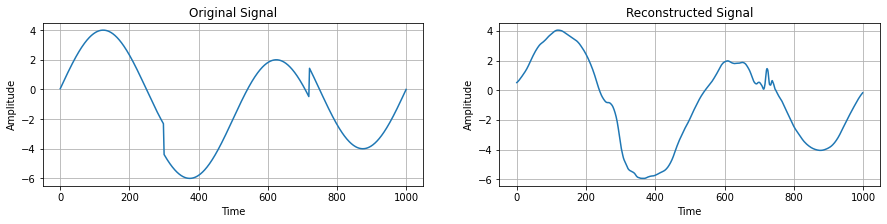

In [11]:
cA5_new = w5[:39]
cD5_new = w5[39:]
cD4_new = w4
cD3_new = w3
cD2_new = w2
cD1_new = w1

x_new = pywt.waverec([cA5_new,cD5_new,cD4_new,cD3_new,cD2_new,cD1_new], 'db5')

fig = plt.figure(figsize=(15,3))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Original Signal", fontsize='large')
ax1.set_xlabel("Time")
ax1.set_ylabel("Amplitude")
ax1.grid()
ax1.plot(t,x)

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("Reconstructed Signal", fontsize='large')
ax2.set_xlabel("Time")
ax2.plot(t,x_new)
ax2.grid()
ax2.set_ylabel("Amplitude")

In [12]:
noise = x - x_new

x_new_pow = x_new ** 2
noise_pow = noise ** 2

x_new_avg_pow = np.mean(x_new_pow)
noise_avg_pow = np.mean(noise_pow)

x_new_avg_db = 10 * np.log10(x_new_avg_pow)
noise_avg_db = 10 * np.log10(noise_avg_pow)

snr_db = x_new_avg_db - noise_avg_db
snr_db

24.624155298670953

### Q3. Download the NASA’s Femto Bearing Dataset from here. This is a dataset containing high frequency sensor data regarding accelerated degradation of bearings

### (a) Deconstruct the signal and smooth it out (remove high frequency noise) by using a suitable threshold.

Text(0, 0.5, 'Amplitude')

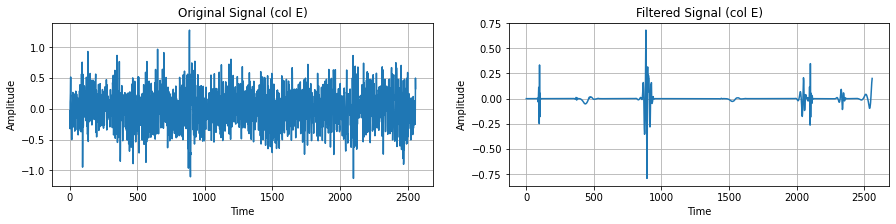

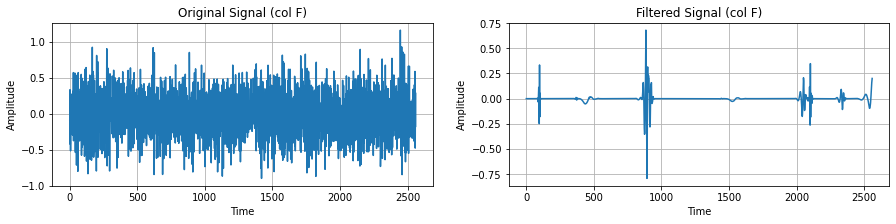

In [4]:
#drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/files/acc_00001.csv',names=["A","B","C","D","E","F"])

# picking only the E and F column as signal data
data1 = np.array(df['E'])
data2 = np.array(df['F'])

# Col E data
cA5,cD5,cD4,cD3,cD2,cD1 = pywt.wavedec(data1,wavelet='db5',level=5)
w5,w4,w3,w2,w1 = thresholding(data1,cA5,cD5,cD4,cD3,cD2,cD1)

cA5_new = w5[:88]
cD5_new = w5[88:]
cD4_new = w4
cD3_new = w3
cD2_new = w2
cD1_new = w1

data1_filt = pywt.waverec([cA5_new,cD5_new,cD4_new,cD3_new,cD2_new,cD1_new], 'db5')
fig = plt.figure(figsize=(15,3))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Original Signal (col E)", fontsize='large')
ax1.set_xlabel("Time")
ax1.set_ylabel("Amplitude")
ax1.grid()
ax1.plot(data1)

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("Filtered Signal (col E)", fontsize='large')
ax2.set_xlabel("Time")
ax2.plot(data1_filt)
ax2.grid()
ax2.set_ylabel("Amplitude")

# Col F data
cA5,cD5,cD4,cD3,cD2,cD1 = pywt.wavedec(data1,wavelet='db5',level=5)
w5,w4,w3,w2,w1 = thresholding(data2,cA5,cD5,cD4,cD3,cD2,cD1)

cA5_new = w5[:88]
cD5_new = w5[88:]
cD4_new = w4
cD3_new = w3
cD2_new = w2
cD1_new = w1

data2_filt = pywt.waverec([cA5_new,cD5_new,cD4_new,cD3_new,cD2_new,cD1_new], 'db5')

fig = plt.figure(2,figsize=(15,3))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Original Signal (col F)", fontsize='large')
ax1.set_xlabel("Time")
ax1.set_ylabel("Amplitude")
ax1.grid()
ax1.plot(data2)

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("Filtered Signal (col F)", fontsize='large')
ax2.set_xlabel("Time")
ax2.plot(data2_filt)
ax2.grid()
ax2.set_ylabel("Amplitude")

### (b) Perform the same operation using Moving Average Filter and compare the results

In [5]:
def MA(x,scale):
  y = np.zeros(len(x)-scale +1,dtype=float)
  for i in range(len(x)-scale +1):
    y[i] = np.sum(x[i:i+scale])/scale
  return y

Text(0, 0.5, 'Amplitude')

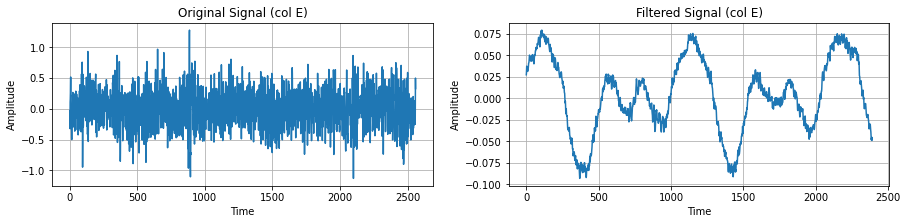

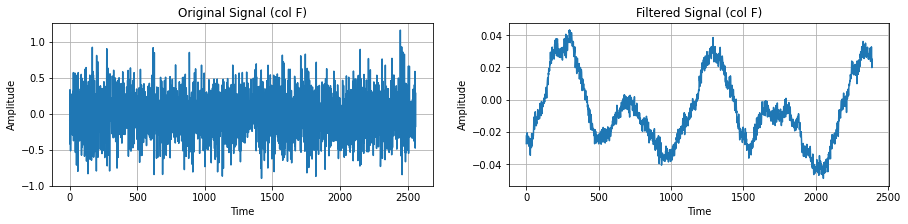

In [7]:
y1 = MA(data1,171)
y2 = MA(data2,171)

fig = plt.figure(1,figsize=(15,3))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Original Signal (col E)", fontsize='large')
ax1.set_xlabel("Time")
ax1.set_ylabel("Amplitude")
ax1.grid()
ax1.plot(data1)

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("Filtered Signal (col E)", fontsize='large')
ax2.set_xlabel("Time")
ax2.plot(y1)
ax2.grid()
ax2.set_ylabel("Amplitude")

fig = plt.figure(2,figsize=(15,3))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Original Signal (col F)", fontsize='large')
ax1.set_xlabel("Time")
ax1.set_ylabel("Amplitude")
ax1.grid()
ax1.plot(data2)

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("Filtered Signal (col F)", fontsize='large')
ax2.set_xlabel("Time")
ax2.plot(y2)
ax2.grid()
ax2.set_ylabel("Amplitude")